In [1]:
#import libraries for use
import pandas as pd
import keras as k
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
from keras.models import model_from_json
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display, Markdown

In [2]:
# # load json and create model
# json_file = open('model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("model.h5")
# print("Loaded model from disk")

In [3]:
#Import Clean Data
csv = pd.read_excel('csv_clean.xlsx')

In [4]:
#Markdown('<h1>Test</h1><br/>')

In [5]:
maxDate = np.max(csv['FormattedDate'])

In [6]:
Markdown('<h1>Data Available Until {}</h1><br/>'.format(maxDate.date()))

<h1>Data Available Until 2021-07-06</h1><br/>

In [7]:
Markdown('<h1>Probability Next Day will have positive price fluctuation: {}</h1><br/>'.format(str(int(np.round(csv.iloc[-1]['Predictions'] * 100))) + '%'))

<h1>Probability Next Day will have positive price fluctuation: 94%</h1><br/>

In [8]:
Markdown('<h3>Move slider to see more data before last available day of data.</h3><br/>'.format(maxDate))

<h3>Move slider to see more data before last available day of data.</h3><br/>

In [9]:
def my_function(Days=100):
    return csv.iloc[-Days:].plot('FormattedDate', 'Close', title='Closing Prices',xlabel='Date',ylabel='Closing Price'), \
    csv.iloc[-Days:].plot('FormattedDate', 'NextDayFluctuation', title='Day over Day Fluctuations',xlabel='Date',ylabel='Day over Day Fluctuation'), \
    csv.iloc[-Days:].plot.scatter(x='Predictions', y='Days1Fluctuation', title='Model Prediction vs Day of Fluctuation',xlabel='Model Predictions of Increase',ylabel='Actual Closing Fluctuation'), \
    print('Day over day positive increases seen in past {} days : {}'.format(Days, np.sum(csv['DaySawIncrease'].iloc[-Days:]))), \
    print('Model has been correct using a 50% cutoff {} of the time in the past {} days.'.format(str(int(np.round(np.average((csv['DaySawIncrease'].iloc[-Days:] == True & csv['Predictions'].iloc[-Days:].ge(0.5)) | (csv['DaySawIncrease'].iloc[-Days:] != True & csv['Predictions'].iloc[-Days:].lt(0.5))),2) * 100)) + "%", Days))


interact(my_function,Days=widgets.IntSlider(min=30, max=300, value=100,step=1,continuous_update=False, title='Days Since last available day'))

interactive(children=(IntSlider(value=100, continuous_update=False, description='Days', max=300, min=30), Outp…

<function __main__.my_function(Days=100)>

In [10]:
Markdown('<h3>Below is a histogram of the model predictions.</h3><br/>')

<h3>Below is a histogram of the model predictions.</h3><br/>

<AxesSubplot:title={'center':'Prediction Frequency'}, ylabel='Frequency'>

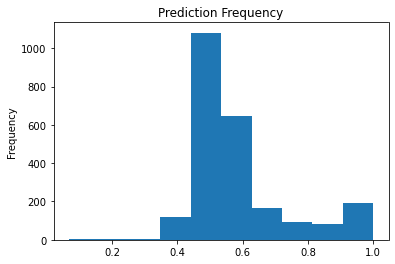

In [11]:
#Plot Closing prices and Fluctuations
# csv.plot('FormattedDate', 'Close')
csv['Predictions'].plot.hist(bins=10, title='Prediction Frequency')

In [12]:
# csv.plot('FormattedDate', 'NextDayFluctuation')
# print(np.average((csv['DaySawIncrease'].iloc[-300:] == True & csv['Predictions'].iloc[-300:].ge(0.5)) | (csv['DaySawIncrease'].iloc[-300:] != True & csv['Predictions'].iloc[-300:].lt(0.5))))

In [13]:
# (csv['DaySawIncrease'].iloc[-10:] != True & csv['Predictions'].iloc[-10:].lt(0.5))

In [14]:
# import statsmodels.api as sm
# x_cols = ['Days1Fluctuation','Days3Fluctuation','Days7Fluctuation','Days15Fluctuation', \
#  'Days30Fluctuation','Days90Fluctuation','Days180Fluctuation','Days360Fluctuation', \
#  'Days1FluctuationVolume','Days3FluctuationVolume','Days7FluctuationVolume','Days15FluctuationVolume', \
#   'Days30FluctuationVolume','Days90FluctuationVolume','Days180FluctuationVolume','Days360FluctuationVolume', \
#             'CloseToHigh','CloseToLow']
# X = csv[x_cols].iloc[-200:-10]
# y = csv['DaySawIncrease'].iloc[-200:-10]
# logit_model=sm.Logit(y,X)
# result=logit_model.fit()

In [15]:
# print(result.summary2())

In [16]:
# x_col_see = ['Date','Close','RollingNextDay','RollingAvg1Days', 'NextDayFluctuation','Days1Fluctuation','DaySawIncrease']
# csv[x_col_see]

In [17]:
#csv.set_index('Date')
from sklearn.cluster import KMeans
x_cols_cluster = ['NextDayFluctuation','Days1Fluctuation']
kmeans_dataset = csv[x_cols_cluster].iloc[-500:-1]
kmeans = KMeans(n_clusters=5, random_state=42).fit(kmeans_dataset)
kmeans_dataset['kmeans_labels'] = kmeans.labels_

<AxesSubplot:xlabel='Days1Fluctuation', ylabel='NextDayFluctuation'>

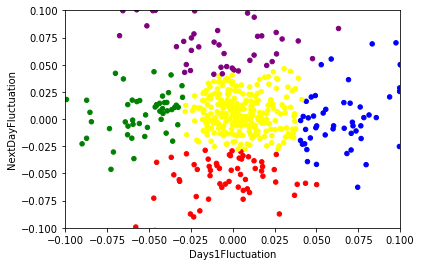

In [18]:
colors = {0:'red', 1:'green', 2:'blue', 3:'yellow',4:'purple',5:'gray',6:'pink'}
kmeans_dataset.plot(x='Days1Fluctuation',y='NextDayFluctuation',kind='scatter',c = kmeans_dataset['kmeans_labels'].map(colors), xlim=(-0.1,0.1),ylim=(-0.1,0.1))

In [19]:
kmeans.inertia_

0.6891464277163555

In [20]:
kmeans_dataset.groupby(['kmeans_labels']).mean()

,NextDayFluctuation,Days1Fluctuation
kmeans_labels,,
0,-0.063210,-0.003051
1,0.010742,-0.065934
2,-0.001574,0.075506
3,0.005260,0.005400
4,0.078348,-0.007493
